Matplotlib is building the font cache; this may take a moment.


7/7 [==============================] - 1s 4ms/step


C:\Users\Shiva\AppData\Local\Temp\ipykernel_2412\2908533631.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


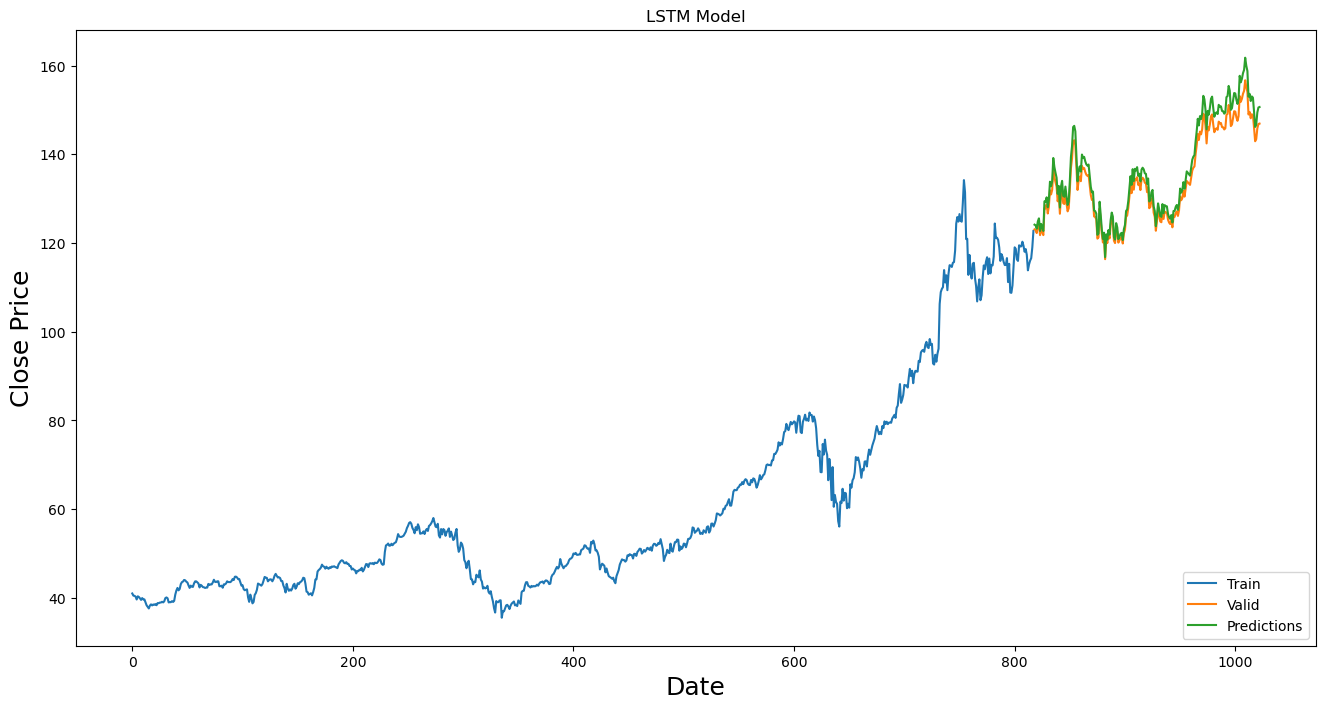

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1504224000&period2=1632672000&interval=1d&events=history&includeAdjustedClose=true')
df = df.sort_values('Date')
df = df.reset_index(drop=True)

# Prepare the data for LSTM
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

train_data_len = int(len(data) * 0.8)
train_data = scaled_data[:train_data_len, :]
test_data = scaled_data[train_data_len:, :]

def create_lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
    model.add(tf.keras.layers.LSTM(50, return_sequences=False))
    model.add(tf.keras.layers.Dense(25))
    model.add(tf.keras.layers.Dense(1))
    return model

# Create the LSTM model
model = create_lstm_model()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data, batch_size=1, epochs=1)

# Make predictions
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()
